#### Import Standard  Modules ####

In [2]:
import numpy as np #NumPy (numerical python). Enables memory-efficient arrays and related functions

from scipy import io #scipy.io module needed for reading matlab files

from math import pi; #loads the constant Pi

import matplotlib.pyplot as plt #needed for most basic plotting functions
from matplotlib import image #needed for colormap list

### Read PAR/REC ###

In [1]:
#need the 'nibabel' module installed to read MR data
import nibabel

In [3]:
mr_file="/Users/Vandiver/Data/sonalleve/HifuCav20160810/scan37_TempSag_20160810.PAR"

mriObj=nibabel.load(mr_file,scaling='fp') #abstract data object encapsulating header and data from PAR/REC


##### Get image data (NumPy array) #####

In [ ]:
mriData=mriObj.get_data() #The actual image data array

In [4]:
mriData.shape

(160, 160, 6, 42)

### Compute phase changes: ###

<ol>
    <li> Parse image data set into parts and dynamics (M,R,I,P)</li>
    <li> Compute phase change across dynamics</li>
</ol>

In [6]:
import MRDataAnalysis #custom module with some helper functions I wrote

In [33]:
#Have to know the number of image parts and guess at the slice ordering 

(Mdata , Pdata) = MRDataAnalysis.parse_scan_parts(mriData,num_parts=2,ordering=0)

(nx,ny,nz,ndyn) = Mdata.shape

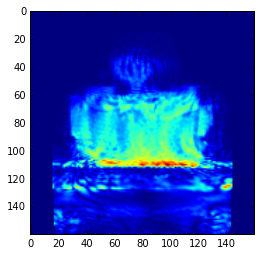

In [32]:
##### Simple plot of magnitude data with default colormap #####
plt.imshow(Mdata[:,:,1,2])

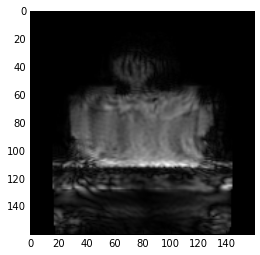

In [30]:
##### Change the  colormap #####
plt.imshow(Mdata[:,:,1,2], cmap=image.cm.gray)

In [26]:
#complex image (Pdata is from -pi to pi)
complexIm = Mdata*np.exp(1j*Pdata)

#now compute phase change between dynamics and the initial baseline 
phaseDiff = np.zeros(complexIm.shape)
for dyn in range(0,ndyn):
    phaseDiff[:,:,:,dyn] = np.angle( complexIm[:,:,:,0] * np.conjugate(complexIm[:,:,:,dyn]) )

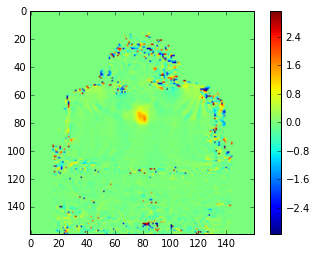

In [27]:
##### Plot the phase change w/ a colorbar #####
plt.imshow(phaseDiff[:,:,1,-1],cmap=image.cm.jet)
plt.colorbar()

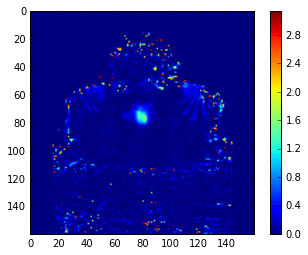

In [28]:
##### Change the range of values plotted w/ vmin and vmax #####
plt.imshow(phaseDiff[:,:,1,-1],cmap=image.cm.jet, vmin=0, vmax=pi)
plt.colorbar()

### Use a mask to overlay another image ###
Have to create 4-channel image structure.
<ul>
<li>Channel 0-2: R,G,B</li>
<li>Channel 3  : alpha (transparency)</li>
</ul>

In [9]:
#### Colorbar with image overlay is tricky ####

### Read TIFF File (requires Pillow)###

In [10]:
### Create multi-panel figures ###

In [11]:
### Image arithmetic ###